# Titanic Survival Data 

Which variable contributed the most to determine a persons's likliehood of surviving?
Dependent -> Did they survive
Independent Variable -> The other variables that could determine that.

- Null Hypothesis - The independent variable has no effect on the outcome (dependent variable)
- Alternative Hypothesis - One or more independent variables do have an effect on the outcome.


- True Positive
- False Positive - Type 1 Error 
- True Negative
- False Negative - Type 2 Error

## Chi-Squared Analysis

## Did more women and children survive compared to men?

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv("../data/Titanic_Passengers.csv")
df

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75
...,...,...,...,...,...,...,...,...,...
1347,"FLETCHER, Miss N.",NaN,NaN,NaN,Female,1,died,£1 10s,1.50
1348,"STEVENS, Mr George",NaN,NaN,NaN,Male,1,died,£1 10s,1.50
1349,"CARRUTHERS, Mr Francis",NaN,NaN,NaN,Male,1,died,NaN,NaN
1350,"COLLIS, Mr",NaN,NaN,NaN,Male,1,died,NaN,NaN


In [23]:
children_df = df[df['Age'] < 18]
children_df

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75
...,...,...,...,...,...,...,...,...,...
182,"PARKER, Mr Clifford Richard",1894.0,1912.0,17.000000,Male,2,died,£10 10s,10.50
183,"DAVIES, Mr Joseph",1895.0,1912.0,17.000000,Male,3,died,£8 1s,8.05
184,"RUSH, Mr Alfred George John",1895.0,1912.0,17.000000,Male,3,died,£8 1s,8.05
185,"CARRAú-ESTEVES, Mr José Pedro",1894.0,1912.0,17.000000,Male,1,died,£47 2s,47.10


In [24]:
df.groupby(["Gender", "Lived_Died"]).count()

Name  Born  Died  Age  Passenger_Class  Fare  Fare_decimal
Gender Lived_Died                                                            
Female died         143   132   131  132              143   143           143
       lived        339   339   326  339              339   339           339
Male   died         709   697   698  697              709   680           680
       lived        161   160   154  160              161   159           159

- What kind of data is the `dependent` variable? String (Lost, Saved)
- What kind of data is the `gender` variable? String (male, female) 
  - `Ordinal` data. Data that can be ordered
  - `Categorical` data. Data that can not be ordered

In [25]:
# Margins = True will show the summary
contingency_table = pd.crosstab(df['Gender'], df['Lived_Died'])
contingency_table

Lived_Died,died,lived
Gender,,
Female,143,339
Male,709,161


In [26]:
children_table = pd.crosstab(children_df['Gender'], children_df['Lived_Died'], margins=True)
children_table

Lived_Died,died,lived,All
Gender,,,
Female,31,52,83
Male,71,33,104
All,102,85,187


In [27]:
male = 161/ (709+161)
female = 339 / (143+339)
children = 85 / (102+85)

print(f'Male Living percentage is {male * 100}')
print(f'Female Living percentage is {female * 100}')
print(f'Children Living percentage is {children * 100}')

      

Male Living percentage is 18.50574712643678
Female Living percentage is 70.33195020746888
Children Living percentage is 45.45454545454545


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from scipy import stats
print(stats.chi2_contingency(contingency_table)[0:3])
# What do these numbers mean?
# You get 3 values back
# 1) Chi-Square : The higher the statistic, the less likelihood that the observed values were the result of pure chance
#- How to interpret "higher"
# 2) Target P-value
# 3) degrees of freedom
print(f'Critical Value {stats.chi2.ppf(0.95,df=1)}')

(104.05195288933228, 2.543346399916496e-23, 2)
Critical Value 3.8414588206941205


Text(0, 0.5, 'Number of Passengers')

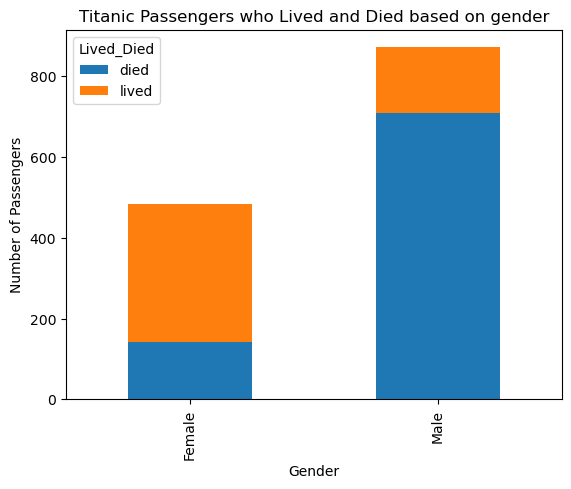

In [30]:
# Stacked Bar chart of Lived/Died Women Men

contingency_table.plot(kind='bar', stacked=True)
plt.title("Titanic Passengers who Lived and Died based on gender")
plt.ylabel("Number of Passengers")

## Chi-Square Example: Was Age relevant?

In [31]:
# Check the age column. It should be the difference of Died - Born. 
# But we care about age at the time of the incident, so Died needs to be 1912
# 1912 - Born

df['Age2'] = 1912 - df['Born']
df

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal,Age2
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58,0.0
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40,1.0
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52,1.0
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78,1.0
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75,1.0
...,...,...,...,...,...,...,...,...,...,...
1347,"FLETCHER, Miss N.",NaN,NaN,NaN,Female,1,died,£1 10s,1.50,NaN
1348,"STEVENS, Mr George",NaN,NaN,NaN,Male,1,died,£1 10s,1.50,NaN
1349,"CARRUTHERS, Mr Francis",NaN,NaN,NaN,Male,1,died,NaN,NaN,NaN
1350,"COLLIS, Mr",NaN,NaN,NaN,Male,1,died,NaN,NaN,NaN


In [32]:
# What about null values?
#df['Age'].dropna()

# is each bin included when making range. 
# is 10 included in the bin for 10 - No
# Bin is 0 - 9.99, 10-19.999
#df['age_bins'] = pd.cut(x=df['Age'], bins=[0,10,20,30,40,50,60,70,80])
df['age_bins'] = pd.cut(x=df['Age'], bins=range(0,90,10))

contingency_table = pd.crosstab(df['age_bins'], df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')
# P-value shows statistical significance
# Chi2 value shows 

Lived_Died  died  lived
age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats (24.465546982751874, 0.0009433264132943268, 7)


/var/folders/d3/3fhlv1gn0k73glsv1lv807fc0000gn/T/ipykernel_42417/846317721.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)


<Axes: xlabel='age_bins'>

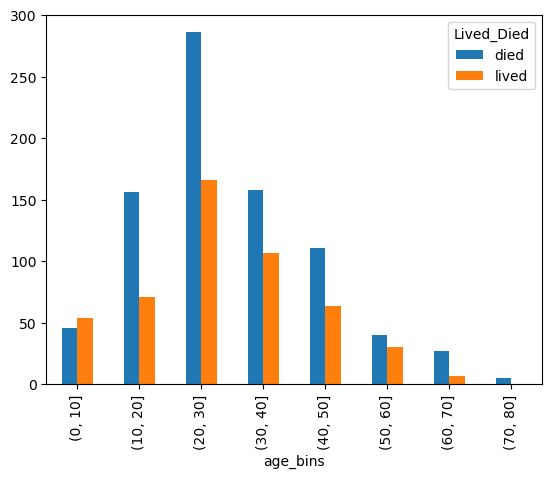

In [33]:
df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)

<Axes: xlabel='age_bins'>

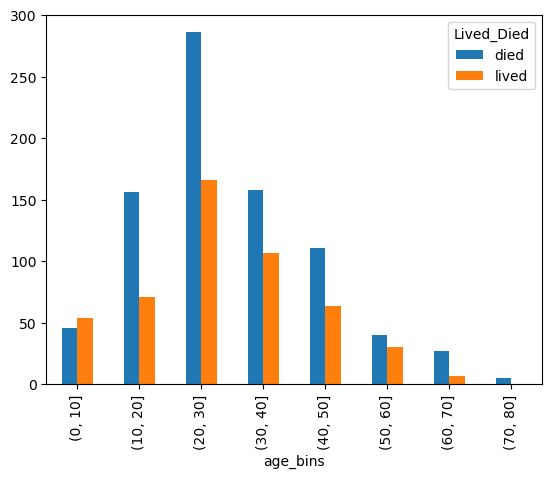

In [34]:
contingency_table.plot(kind='bar')

In [35]:
# Create a heatmap
# Use a pivot table
#pivot_table = pd.pivot(contingency_table, columns='Lived_Died')

import seaborn as sns
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
#sns.heatmap(contingency_table, cmap='coolwarm')

In [36]:
passenger_df = pd.read_csv("../data/Titanic_Passengers.csv")
passenger_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal'], axis=1, inplace=True)
passenger_df.dropna(inplace=True)
passenger_df

,Age,Gender,Passenger_Class,Lived_Died
0,0.166667,Female,3,lived
1,0.333333,Male,3,died
2,0.416667,Male,3,lived
3,0.583333,Male,3,died
4,0.750000,Male,2,lived
...,...,...,...,...
1323,71.000000,Male,1,died
1324,71.000000,Male,1,died
1325,71.000000,Male,2,died
1326,71.000000,Male,2,died


In [37]:
le = preprocessing.LabelEncoder()

In [38]:
passenger_df['Lived_Died_int'] = le.fit_transform(passenger_df['Lived_Died'])
passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins=range(0,90,10))


print(passenger_df)
# use pivotttable
pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index='Gender', columns=['age_bins'])
pivot_table.applymap(lambda x: 1-x) # invert values in heatmap
pivot_table

            Age  Gender  Passenger_Class Lived_Died  Lived_Died_int  age_bins
0      0.166667  Female                3      lived               1   (0, 10]
1      0.333333    Male                3       died               0   (0, 10]
2      0.416667    Male                3      lived               1   (0, 10]
3      0.583333    Male                3       died               0   (0, 10]
4      0.750000    Male                2      lived               1   (0, 10]
...         ...     ...              ...        ...             ...       ...
1323  71.000000    Male                1       died               0  (70, 80]
1324  71.000000    Male                1       died               0  (70, 80]
1325  71.000000    Male                2       died               0  (70, 80]
1326  71.000000    Male                2       died               0  (70, 80]
1327  74.000000    Male                3       died               0  (70, 80]

[1328 rows x 6 columns]


/var/folders/d3/3fhlv1gn0k73glsv1lv807fc0000gn/T/ipykernel_42417/2622870847.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index='Gender', columns=['age_bins'])
/var/folders/d3/3fhlv1gn0k73glsv1lv807fc0000gn/T/ipykernel_42417/2622870847.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) # invert values in heatmap


age_bins,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
Gender,,,,,,,,
Female,0.565217,0.658824,0.748299,0.767677,0.736842,0.884615,0.545455,NaN
Male,0.518519,0.105634,0.183607,0.186747,0.186441,0.159091,0.043478,0.0


<Axes: xlabel='age_bins', ylabel='Gender'>

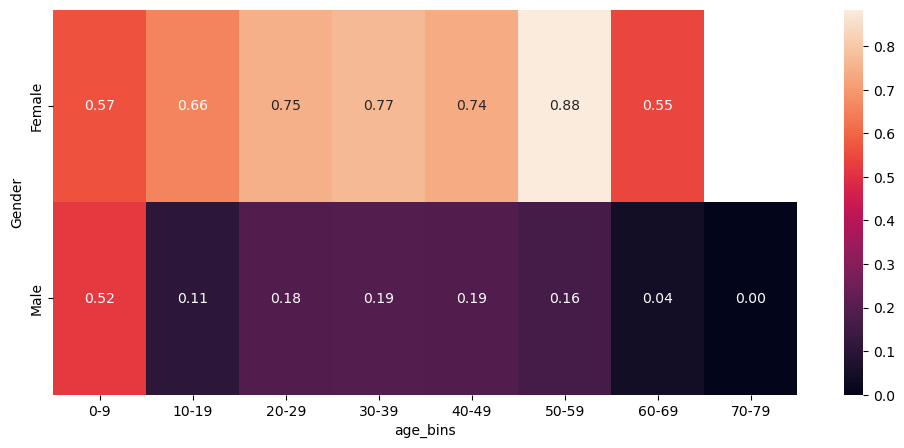

In [39]:
# Create heatmap
plt.figure(figsize=(12,5))
x_axis_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
sns.heatmap(pivot_table,annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt='.2f', cmap='rocket')
#plt.xticks(rotation=90)


In [40]:
# Task: Did the titanic passenger class affect survival rate?

In [41]:
passenger_df2 = pd.read_csv("../data/Titanic_Passengers.csv")
passenger_df2.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal','Gender','Age'], axis=1, inplace=True)
passenger_df2.dropna(inplace=True)
passenger_df2
# Passenger Class is ordinal data - can order it.

,Passenger_Class,Lived_Died
0,3,lived
1,3,died
2,3,lived
3,3,died
4,2,lived
...,...,...
1347,1,died
1348,1,died
1349,1,died
1350,1,died


In [42]:
passenger_df2['Lived_Died_int'] = le.fit_transform(passenger_df2['Lived_Died'])
passenger_df2



,Passenger_Class,Lived_Died,Lived_Died_int
0,3,lived,1
1,3,died,0
2,3,lived,1
3,3,died,0
4,2,lived,1
...,...,...,...
1347,1,died,0
1348,1,died,0
1349,1,died,0
1350,1,died,0


<Axes: >

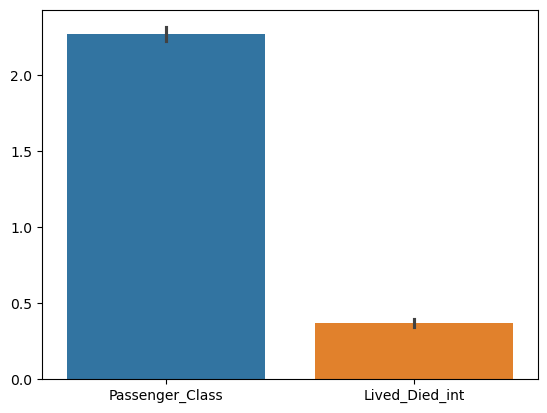

In [43]:
# Bar plot
sns.barplot(data=passenger_df2)

In [44]:
#pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', columns=['Passenger_Class'])
contingency_table = pd.crosstab(passenger_df2['Lived_Died'],passenger_df2['Passenger_Class'], margins=False)
contingency_table


Passenger_Class,1,2,3
Lived_Died,,,
died,149,175,528
lived,201,118,181


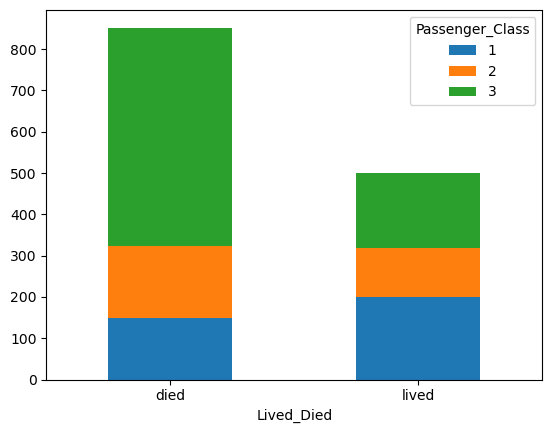

In [45]:
contingency_table.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.show()

In [46]:
from scipy import stats

print(stats.chi2_contingency(contingency_table)[0:3])

(104.05195288933228, 2.543346399916496e-23, 2)


Which Passenger Class is responsbile for the significance in survival rate?
- Chi-Square tells us that at least one of the passenger class is different from what we would expect if the variables were independent
- This is our first test, so it is a `priori test`
- To continue our analysis, we will run another test, `post-hoc` test

### Post-Hoc Test (Fisher's Exact Test)
- Compare every passenger class to every other to see if there is statistical significance
- We could apply chi-square test for each of the 3 separate comparisons but our sample data is too small for that..
- Fisher is better option in this case

In [47]:
passenger_df2 = pd.read_csv("../data/Titanic_Passengers.csv")
contingency_table = pd.crosstab(passenger_df2['Passenger_Class'],passenger_df2['Lived_Died'], margins=False)
print(contingency_table)
first_class = contingency_table.iloc[0].values # Extract Row values
second_class = contingency_table.iloc[1].values # Extract Row values
third_class = contingency_table.iloc[2].values # Extract Row values
first_class
# Create a fisher's exact test to determine if there is a relationship between passenger class
oddsratio, pvalue = stats.fisher_exact([first_class,second_class])
print(f"Fisher's Exact Test for First and Second Class: {pvalue}")
oddsratio, pvalue = stats.fisher_exact([first_class,third_class])
print(f"Fisher's Exact Test for First and third Class: {pvalue}")
oddsratio, pvalue = stats.fisher_exact([second_class,third_class])
print(f"Fisher's Exact Test for second and third Class: {pvalue}")

Lived_Died       died  lived
Passenger_Class             
1                 149    201
2                 175    118
3                 528    181
Fisher's Exact Test for First and Second Class: 1.827149276703859e-05
Fisher's Exact Test for First and third Class: 7.457205699022123e-24
Fisher's Exact Test for second and third Class: 5.007621820657881e-06


In [48]:
first = 149/ (201+149)
print(first)

0.4257142857142857


Each of the Fisher's Test reveals the statistical significance

Another way to conceptualize the result is to look at percentages:

| Passenger Class | Died |
| --------------- | -----|
| First Class     |  43% |
| Second Class    |  60% |
| Third Class     |  74% |

 Todo - Heatmap of Passenger Class split in age_range by gender and survival

            Age  Gender  Passenger_Class Lived_Died  Lived_Died_int  age_bins
0      0.166667  Female                3      lived               1   (0, 10]
1      0.333333    Male                3       died               0   (0, 10]
2      0.416667    Male                3      lived               1   (0, 10]
3      0.583333    Male                3       died               0   (0, 10]
4      0.750000    Male                2      lived               1   (0, 10]
...         ...     ...              ...        ...             ...       ...
1323  71.000000    Male                1       died               0  (70, 80]
1324  71.000000    Male                1       died               0  (70, 80]
1325  71.000000    Male                2       died               0  (70, 80]
1326  71.000000    Male                2       died               0  (70, 80]
1327  74.000000    Male                3       died               0  (70, 80]

[1328 rows x 6 columns]


/var/folders/d3/3fhlv1gn0k73glsv1lv807fc0000gn/T/ipykernel_42417/4125141749.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index='Gender', columns=['age_bins','Passenger_Class'])
/var/folders/d3/3fhlv1gn0k73glsv1lv807fc0000gn/T/ipykernel_42417/4125141749.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) # invert values in heatmap


<Axes: xlabel='age_bins-Passenger_Class', ylabel='Gender'>

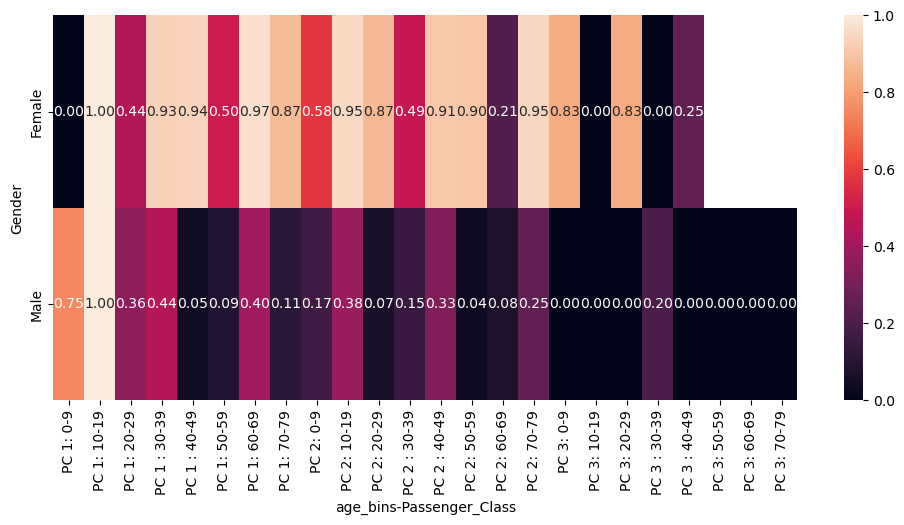

In [49]:
passenger_df['Lived_Died_int'] = le.fit_transform(passenger_df['Lived_Died'])
passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins=range(0,90,10))


print(passenger_df)
# use pivotttable
pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index='Gender', columns=['age_bins','Passenger_Class'])
pivot_table.applymap(lambda x: 1-x) # invert values in heatmap
pivot_table

# Create heatmap
plt.figure(figsize=(12,5))
x_axis_labels = ['PC 1: 0-9','PC 1: 10-19','PC 1: 20-29','PC 1 : 30-39','PC 1 : 40-49','PC 1: 50-59','PC 1: 60-69','PC 1: 70-79',
                 'PC 2: 0-9','PC 2: 10-19','PC 2: 20-29','PC 2 : 30-39','PC 2 : 40-49','PC 2: 50-59','PC 2: 60-69','PC 2: 70-79',
                 'PC 3: 0-9','PC 3: 10-19','PC 3: 20-29','PC 3 : 30-39','PC 3 : 40-49','PC 3: 50-59','PC 3: 60-69','PC 3: 70-79']
sns.heatmap(pivot_table,annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt='.2f', cmap='rocket')
#plt.xticks(rotation=90)

### T-test: Fare and Gender
- While `Chi-Test` and `Fisher-Test` focus on `categorical` discrete variable, the `T-test` and `ANOVA` test target `continuous` data

#### How was Fare affected by Gender and Passenger class?
- did one gender pay more than the other?
- is there a difference in fare between passenger classes?
- is there an interaction between gender and passenger class on the resulting fare?



In [50]:
passenger_df3 = pd.read_csv("../data/Titanic_Passengers.csv")


Text(0, 0.5, 'Fare amounts in pounds')

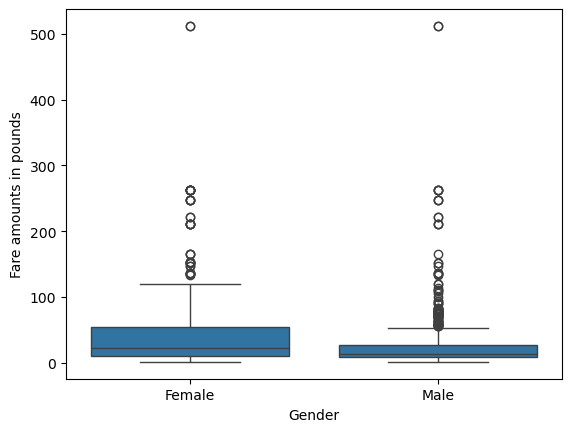

In [51]:
sns.boxplot(y=passenger_df3['Fare_decimal'], x = passenger_df3['Gender'])
plt.ylabel('Fare amounts in pounds')

In [52]:
male = passenger_df3[passenger_df3['Gender'] == 'Male']
print(f'Male Summary {male['Fare_decimal'].describe()}')

Male Summary count    839.000000
mean      26.226067
std       42.514485
min        1.000000
25%        7.895000
50%       12.350000
75%       26.550000
max      512.330000
Name: Fare_decimal, dtype: float64


In [53]:
female = passenger_df3[passenger_df3['Gender'] == 'Female']
print(f'Female Summary {female['Fare_decimal'].describe()}')

Female Summary count    482.000000
mean      45.118299
std       63.149875
min        1.000000
25%       10.460000
50%       21.555000
75%       54.525000
max      512.330000
Name: Fare_decimal, dtype: float64


In [54]:
from scipy.stats import ttest_ind

In [55]:
passenger_df3.dropna(inplace=True)
male = passenger_df3[passenger_df3['Gender'] == 'Male']
female = passenger_df3[passenger_df3['Gender'] == 'Female']


In [56]:
# Run the test
statistics, pvalue = ttest_ind(male['Fare_decimal'], female['Fare_decimal'])
print(f'T-test for Fare Paid p-value {pvalue}')

T-test for Fare Paid p-value 6.093364811911871e-13


## ANOVA Example: Price Differecne between passenger class
- T-test specializes in comparing `two` populations
- `ANOVA` (Analysis of Variation) test will allow you to compare the influence of `three of more` populations

Fare prices are `continous numerical dependent variable`. They are affected by the 3 passenger classes

Install new package:
```bash
conda install statsmodels
```


In [ ]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [58]:
passenger_df = pd.read_csv("../data/Titanic_Passengers.csv")


In [59]:
# Load your OLS (Ordinary Least Squares) model
model = ols('Fare_decimal ~ C(Passenger_Class)', data=passenger_df).fit()
# ANOVA Table
anova_table = sm.stats.anova_lm(model, typ=1) #typ = # is the anova table format
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Passenger_Class),2.0,1.201111e+06,600555.522821,338.116478,2.964452e-119
Residual,1318.0,2.341004e+06,1776.179397,NaN,NaN


`PR(>F)` is your `P-value`

#### ANOVA Notation (R-Style Formulas):
- The `~` separates the left side from the right side
- The `+` char adds a new separated column to the design matrix
- The `:` char adds a new interaction column to the model matrix
- The `*` char signifies that both individual columns are combined...

The string: `Fare_decimal ~ C(Passenger_class)` translates to:
- Fare_decimal variable is affected by the categorical variable (`C`) Passenger Class

Conclusion - There is some difference in price relative to the passenger class

<Axes: xlabel='Passenger_Class', ylabel='Fare_decimal'>

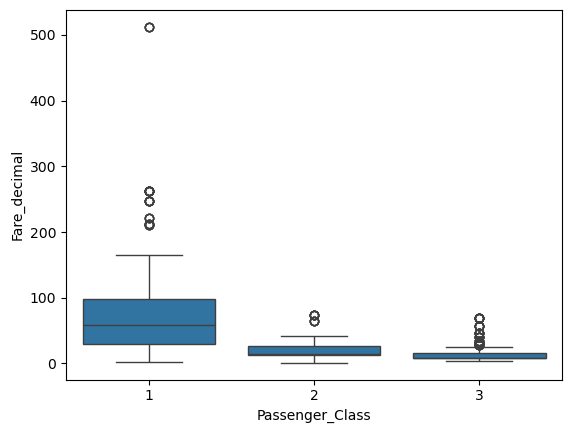

In [60]:
# Create a box plot of fare paid by passenger class
sns.boxplot(y=passenger_df['Fare_decimal'], x = passenger_df['Passenger_Class'])

Do a `post-hoc` test on this. For ANOVA we use the `Tukey HSD` test to compare each individual population from a statisticall significant ANOVA.


In [61]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd


passenger_df = pd.read_csv("../data/Titanic_Passengers.csv")
# Drop unused columns
passenger_df.drop(columns=['Name', 'Born', 'Died', 'Fare', 'Lived_Died', 'Gender'], inplace=True)
# Drop rows with undefined values
passenger_df.dropna(inplace=True)
passenger_df

,Age,Passenger_Class,Fare_decimal
0,0.166667,3,20.58
1,0.333333,3,14.40
2,0.416667,3,8.52
3,0.583333,3,13.78
4,0.750000,2,18.75
...,...,...,...
1323,71.000000,1,49.50
1324,71.000000,1,34.65
1325,71.000000,2,10.50
1326,71.000000,2,12.35


In [62]:
mc = MultiComparison(passenger_df['Fare_decimal'], passenger_df['Passenger_Class'])
result = mc.tukeyhsd()
result.summary()
# Compares each of the groups to each other


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-64.5942,0.0,-72.6865,-56.5018,True
1,3,-72.9052,0.0,-79.4909,-66.3195,True
2,3,-8.311,0.016,-15.3695,-1.2525,True


If no statisitcal signficance is found, than `reject` column will indicate `False`, otherwise it will be `True`